In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
test = pd.read_csv("/content/drive/MyDrive/Datathon/test_v2.csv")
train = pd.read_csv("/content/drive/MyDrive/Datathon/train_v2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
train.head()

,norepinephrine_equivalent_dose,invasive_vent,albumin,mchc,los_hospital,pt,rrt,ph,delta_ld_ldh,mortality_in,...,Asian,Black,Hispanic,Other_race_group,White,Medicaid,Medicare,Other,los_icu_dead,los_icu_surv
0,0.000000,1.0,0.610169,0.875312,0.022727,0.075333,0.0,0.960682,0.791722,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.014170
1,0.004503,1.0,0.355932,0.775561,0.077273,0.070000,0.0,0.967235,0.507584,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.076889
2,0.000000,1.0,0.355932,0.785536,0.077273,0.078667,0.0,0.977720,0.507434,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.076889
3,0.002858,1.0,0.711864,0.857855,0.018182,0.091333,0.0,0.959371,0.506559,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.011424
4,0.003314,1.0,0.711864,0.840399,0.018182,0.091333,0.0,0.961992,0.506501,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.011424


In [163]:
test.columns

Index(['anchor_age', 'rrt', 'los_icu', 'SOFA_admission', 'mortality_in',
       'chloride', 'rbc', 'delta_rrt', 'sofa_cv', 'ld_ldh', 'FiO2',
       'delta_vent_start', 'lactate', 'SaO2', 'diff', 'hidden_hypoxemia', 'ph',
       'CCI', 'hemoglobin', 'los_hospital', 'mchc', 'language', 'aniongap',
       'sofa_resp', 'albumin', 'delta_SpO2', 'gender', 'HH_study',
       'norepinephrine_equivalent_dose', 'SpO2', 'invasive_vent', 'rdw',
       'bicarbonate', 'inr', 'BMI', 'HFNC', 'InvasiveVent', 'NonInvasiveVent',
       'None_ventilation', 'SupplementalOxygen', 'Tracheostomy', 'Non-White',
       'White', 'Medicaid', 'Medicare', 'Other', 'los_icu_dead',
       'los_icu_surv'],
      dtype='object')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import resample

def logistic(test,train):

  # Separate the minority and majority classes




  minority_class = train[train['HH_study'] == 1]
  majority_class = train[train['HH_study'] == 0]

  # Oversample the minority class to match the size of the majority class
  oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

  # Combine the oversampled minority class and majority class
  train = pd.concat([majority_class, oversampled_minority])



  X_test=test[['SpO2','albumin','ph','CCI','FiO2','delta_SpO2','gender','SupplementalOxygen','bicarbonate']]
  Y_test=(test['HH_study'])

  X_train=train[['SpO2','albumin','ph','CCI','FiO2','delta_SpO2','gender','SupplementalOxygen','bicarbonate']]
  Y_train=(train['HH_study'])

  

  model = LogisticRegression()
  

# Fit the logistic regression model to the training data
  model.fit(X_train, Y_train)

# Make predictions on the test data
  y_pred = model.predict(X_test)

# Calculate the accuracy score
  accuracy = accuracy_score(Y_test, y_pred)

# Print the accuracy score
  print("Accuracy:", accuracy)
  target_names = ['HH_study']
  report = pd.DataFrame(classification_report(Y_test, y_pred, output_dict=True))
  print(report)
  test_model(X_test,Y_test,model)


In [199]:
train.columns

Index(['anchor_age', 'rrt', 'los_icu', 'SOFA_admission', 'mortality_in',
       'chloride', 'rbc', 'delta_rrt', 'sofa_cv', 'ld_ldh', 'FiO2',
       'delta_vent_start', 'lactate', 'SaO2', 'diff', 'hidden_hypoxemia', 'ph',
       'CCI', 'hemoglobin', 'los_hospital', 'mchc', 'language', 'aniongap',
       'sofa_resp', 'albumin', 'delta_SpO2', 'gender', 'HH_study',
       'norepinephrine_equivalent_dose', 'SpO2', 'invasive_vent', 'rdw',
       'bicarbonate', 'inr', 'BMI', 'HFNC', 'InvasiveVent', 'NonInvasiveVent',
       'None_ventilation', 'SupplementalOxygen', 'Tracheostomy', 'Non-White',
       'White', 'Medicaid', 'Medicare', 'Other', 'los_icu_dead',
       'los_icu_surv'],
      dtype='object')

In [218]:
train['HH_study'].mean()

0.16441901256577623

Accuracy: 0.6517785504145494
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.879895     0.204041  0.651779      0.541968      0.779574
recall         0.684516     0.463964  0.651779      0.574240      0.651779
f1-score       0.770005     0.283434  0.651779      0.526720      0.697781
support    12736.000000  2220.000000  0.651779  14956.000000  14956.000000
              precision    recall  f1-score   support

         0.0       0.88      0.68      0.77     12736
         1.0       0.20      0.46      0.28      2220

    accuracy                           0.65     14956
   macro avg       0.54      0.57      0.53     14956
weighted avg       0.78      0.65      0.70     14956



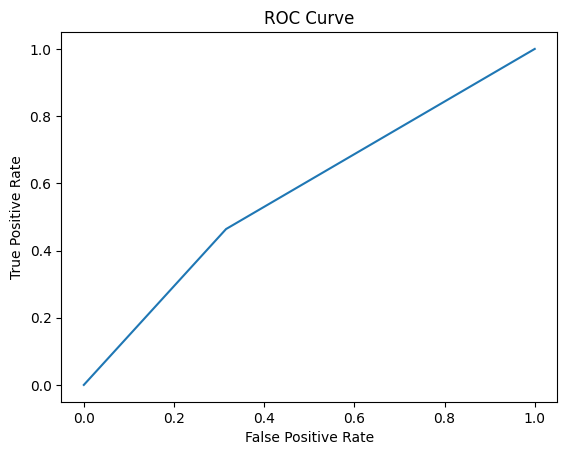

Accuracy: 0.6668001601922307
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.897766     0.202291    0.6668     0.550029      0.803556
recall        0.693573     0.495935    0.6668     0.594754      0.666800
f1-score      0.782569     0.287366    0.6668     0.534968      0.715487
support    8635.000000  1353.000000    0.6668  9988.000000   9988.000000
              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78      8635
         1.0       0.20      0.50      0.29      1353

    accuracy                           0.67      9988
   macro avg       0.55      0.59      0.53      9988
weighted avg       0.80      0.67      0.72      9988



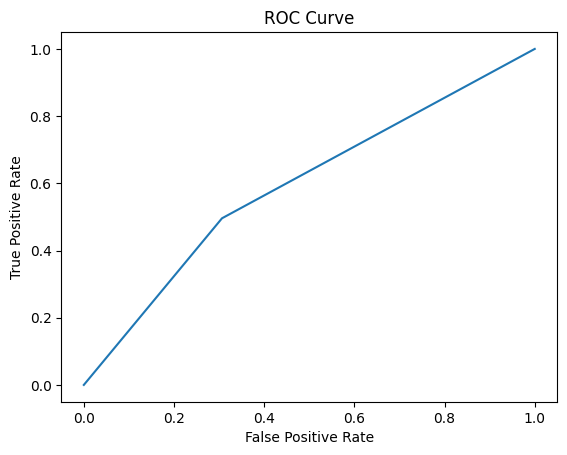

Accuracy: 0.6354669887278583
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.844465    0.212895  0.635467     0.528680      0.734245
recall        0.684467    0.403691  0.635467     0.544079      0.635467
f1-score      0.756094    0.278773  0.635467     0.517434      0.672794
support    4101.000000  867.000000  0.635467  4968.000000   4968.000000
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.76      4101
         1.0       0.21      0.40      0.28       867

    accuracy                           0.64      4968
   macro avg       0.53      0.54      0.52      4968
weighted avg       0.73      0.64      0.67      4968



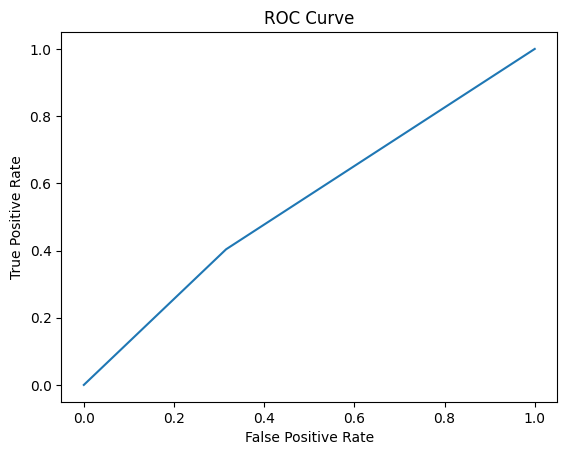

In [20]:

white_train = train[train.White==1]
white_test = test[test.White==1]

black_train = train[train.White==0]
black_test = test[test.White==0]


logistic(white_test,white_train)
logistic(black_test,black_train)




In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
def test_model(X_test, y_test, model):
   
    y_pred = model.predict(X_test)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    fpr, tpr, _ = roc_curve(y_test,  y_pred)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


  